In [44]:
import pandas as pd
import numpy as np

from sklearn import linear_model

## Step 1 & 2
- Complete function polynomial_dataframe()

In [45]:
def polynomial_dataframe(feature, degree):
    # Assume that degree >= 1
    # Initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

## Steps 3
1. Read data
2. Sorting sales data.

In [46]:
dtype_dict = {
    'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float,
    'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float,
    'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float,
    'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
    'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int
}

sales = pd.read_csv('data/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living', 'price'])

In [47]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
21332,9266700190,20150511T000000,245000.0,1.0,1.00,390.0,2000,1,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340.0,5100.0
8623,6303400395,20150130T000000,325000.0,1.0,0.75,410.0,8636,1,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190.0,8636.0
11500,4322200105,20150331T000000,229050.0,1.0,1.00,420.0,3298,1,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460.0,4975.0
14466,7549801385,20140612T000000,280000.0,1.0,0.75,420.0,6720,1,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420.0,6720.0
465,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0


## Step 4 & 5
- Generate poly 1 data.

In [48]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [49]:
poly1_data

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
21332,390.0,245000.0
8623,410.0,325000.0
11500,420.0,229050.0
14466,420.0,280000.0
465,430.0,80000.0


## Step 6
- Run regression on poly1_data

In [50]:
power_1 = poly1_data.loc[:, 'power_1'].values
power_1 = np.reshape(power_1, (len(power_1), 1))
price = poly1_data.loc[:, 'price'].values
price = np.reshape(price, (len(price), 1))

model1 = linear_model.LinearRegression()
model1.fit(power_1, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 7
- Run charts

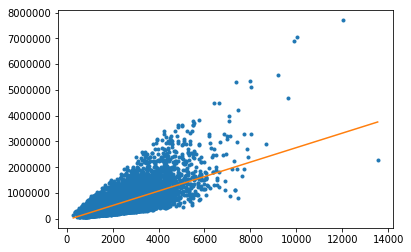

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(
    poly1_data['power_1'], poly1_data['price'], '.',
    poly1_data['power_1'], model.predict(power_1),'-'
)

## Step 9
- Higher degree polynomial.

In [52]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_15 = PolynomialFeatures(degree=15)
power_15 = poly_15.fit_transform(power_1)

model15 = linear_model.LinearRegression()
model15.fit(power_15, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
model15.intercept_, model15.coef_

(array([ 537116.32963771]),
 array([[  0.00000000e+00,   1.35991634e-50,   1.86861147e-56,
           3.84822426e-91,   6.46712511e-78,   3.14372683e-75,
           2.68575522e-71,   2.26147568e-67,   1.85900299e-63,
           1.47144116e-59,   1.09771012e-55,   7.43509038e-52,
           4.23015578e-48,   1.61618577e-44,  -2.49283826e-48,
           9.59718336e-53]]))

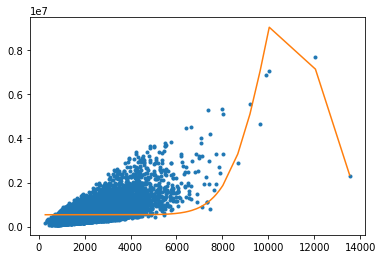

In [55]:
plt.plot(
    poly1_data['power_1'], poly1_data['price'], '.',
    poly1_data['power_1'], model15.predict(power_15),'-'
)

## Step 10
- Read 4 different dataset.

In [61]:
sets = list()
models = list()
for i in range(1, 5):
    set_ = pd.read_csv('data/wk3_kc_house_set_{0}_data.csv'.format(i), dtype=dtype_dict)
    set_ = set_.sort_values(['sqft_living', 'price'])
    poly1_data = polynomial_dataframe(set_['sqft_living'], 1)
    poly1_data['price'] = set_['price']
    sets.append(poly1_data.copy())
    
    power_1 = poly1_data.loc[:, 'power_1'].values
    power_1 = np.reshape(power_1, (len(power_1), 1))
    price = poly1_data.loc[:, 'price'].values
    price = np.reshape(price, (len(price), 1))
    
    power_15 = poly_15.fit_transform(power_1)
    model_ = linear_model.LinearRegression()
    model_.fit(power_15, price)
    models.append(model_)

In [59]:
for model in models:
    print(model.intercept_, model.coef_)

[ 539058.81866788] [[  0.00000000e+00   1.28842086e-50   3.01567748e-55   1.72116468e-91
    1.33208608e-77   1.55858038e-73   1.10358333e-70   8.37724029e-67
    6.23411957e-63   4.49156442e-59   3.06938763e-55   1.91749300e-51
    1.01335180e-47   3.62176959e-44  -5.63501661e-48   2.18641116e-52]]
[ 506866.70541862] [[  0.00000000e+00   3.40105673e-39   4.70870072e-45   1.55716218e-49
    3.30319627e-74  -2.61012173e-54   8.23283034e-59   3.62352454e-55
    1.49599410e-51   5.73163832e-48   1.94877552e-44   5.37108690e-41
    9.36636464e-38  -3.61949030e-41   4.63300802e-45  -1.96220473e-49]]
[ 530874.31665337] [[  0.00000000e+00   5.94972655e-49  -3.73275150e-55   3.98272978e-59
    7.30952961e-76   6.72328695e-73   4.27894908e-69   2.68009626e-65
    1.63911362e-61   9.66435015e-58   5.38044653e-54   2.72563636e-50
    1.16253248e-46   3.33756141e-43  -6.76238818e-47   3.43132932e-51]]
[ 494810.1652876] [[  0.00000000e+00   3.39068783e-39   1.89743214e-44   3.46686487e-49
   -4.176

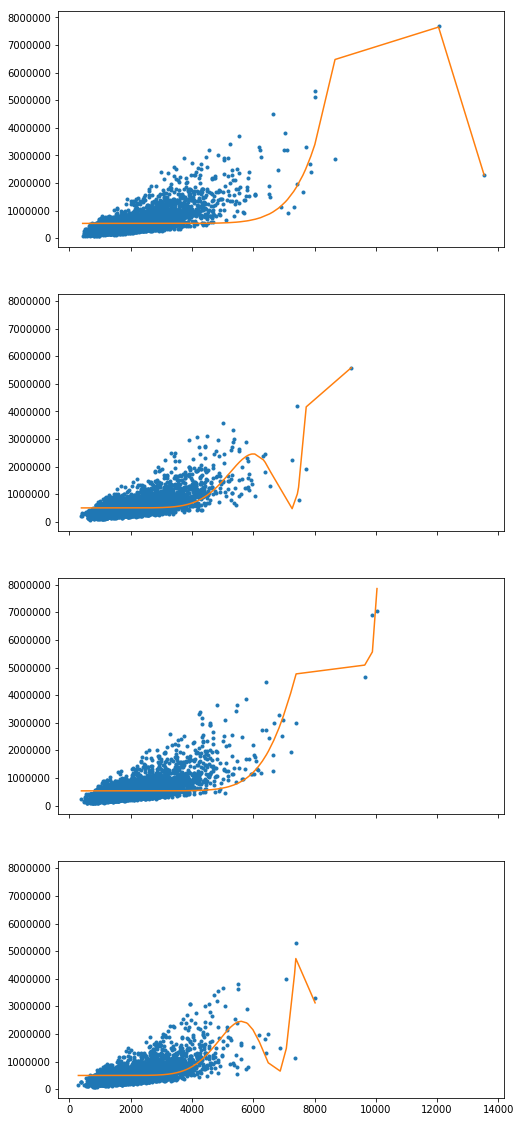

In [81]:
fig, axes = plt.subplots(4, sharex=True, sharey=True, figsize=(8, 20))

for i in range(0, 4):
    power_1 = sets[i].loc[:, 'power_1'].values
    power_1 = np.reshape(power_1, (len(power_1), 1))
    power_15 = poly_15.fit_transform(power_1)

    axes[i].plot(
        sets[i]['power_1'], sets[i]['price'], '.',
        sets[i]['power_1'], models[i].predict(power_15),'-'
    )

plt.show()

## Step 14 & 15
- Read training, testing, and validation data.

In [89]:
train_data = pd.read_csv('data/wk3_kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('data/wk3_kc_house_test_data.csv', dtype=dtype_dict)
valid_data = pd.read_csv('data/wk3_kc_house_valid_data.csv', dtype=dtype_dict)

train_data = train_data.sort_values(['sqft_living', 'price'])
test_data = test_data.sort_values(['sqft_living', 'price'])
valid_data = valid_data.sort_values(['sqft_living', 'price'])

In [104]:
from sklearn.metrics import mean_squared_error
rss_valid = list()

poly1_data = polynomial_dataframe(train_data['sqft_living'], 1)
poly1_data['price'] = train_data['price']
power_1 = poly1_data.loc[:, 'power_1'].values
power_1 = np.reshape(power_1, (len(power_1), 1))
price = poly1_data.loc[:, 'price'].values
price = np.reshape(price, (len(price), 1))

poly1_valid = polynomial_dataframe(valid_data['sqft_living'], 1)
poly1_valid['price'] = valid_data['price']
power_1_valid = poly1_valid.loc[:, 'power_1'].values
power_1_valid = np.reshape(power_1_valid, (len(power_1_valid), 1))
price_valid = poly1_valid.loc[:, 'price'].values
price_valid = np.reshape(price_valid, (len(price_valid), 1))

for i in range(1, 16):
    poly = PolynomialFeatures(degree=i)
    power = poly.fit_transform(power_1)
    power_valid = poly.fit_transform(power_1_valid)
    
    model_ = linear_model.LinearRegression()
    model_.fit(power, price)
    y_pred = model_.predict(power_valid)
    rss_valid.append(mean_squared_error(price_valid, y_pred))

In [105]:
for i in range(1, 16):
    print('Degree {0}:\tRSS={1}'.format(i, rss_valid[i-1]))

Degree 1:	RSS=65292982490.875534
Degree 2:	RSS=64759217717.334496
Degree 3:	RSS=64952805423.2363
Degree 4:	RSS=65385359680.23672
Degree 5:	RSS=65204715948.29945
Degree 6:	RSS=58772036108.55392
Degree 7:	RSS=111452555988.84932
Degree 8:	RSS=735621967309.2239
Degree 9:	RSS=4701181764997.426
Degree 10:	RSS=25701093462733.258
Degree 11:	RSS=123892293651624.77
Degree 12:	RSS=511581738743247.94
Degree 13:	RSS=79047535249461.84
Degree 14:	RSS=238459878053063.5
Degree 15:	RSS=721851385019209.4


## Step 17

In [109]:
poly1_data = polynomial_dataframe(train_data['sqft_living'], 1)
poly1_data['price'] = train_data['price']
power_1 = poly1_data.loc[:, 'power_1'].values
power_1 = np.reshape(power_1, (len(power_1), 1))
price = poly1_data.loc[:, 'price'].values
price = np.reshape(price, (len(price), 1))

poly1_test = polynomial_dataframe(test_data['sqft_living'], 1)
poly1_test['price'] = test_data['price']
power_1_test = poly1_test.loc[:, 'power_1'].values
power_1_test = np.reshape(power_1_test, (len(power_1_test), 1))
price_test = poly1_test.loc[:, 'price'].values
price_test = np.reshape(price_test, (len(price_test), 1))

poly = PolynomialFeatures(degree=6)
power = poly.fit_transform(power_1)
power_test = poly.fit_transform(power_1_test)

model_ = linear_model.LinearRegression()
model_.fit(power, price)
y_pred = model_.predict(power_test)
print(mean_squared_error(price_test, y_pred))
print(len(price_test))
print(mean_squared_error(price_test, y_pred) * len(price_test))

60994637929.9
2217
1.35225112291e+14
